### Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. 
For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt. 

You can download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
unzip data.zip
```
### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 

In [4]:
# Imports
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [5]:
# Path to Dataset:
train_dir = './Dataset/train'
test_dir = './Dataset/test'

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [6]:
# Model Creation:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8), metrics=['acc'])

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

**Answer: `binary crossentropy`**

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

**Answer: `896`**

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir, class_mode='binary', target_size=(150, 150), batch_size=20, shuffle=True)

Found 3677 images belonging to 2 classes.


In [14]:
validation_generator = val_datagen.flow_from_directory(test_dir, class_mode='binary', target_size=(150, 150), batch_size=20, shuffle=True)

Found 918 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


2023-11-18 23:01:53.020652: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2023-11-18 23:01:53.233325: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-18 23:01:54.069051: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-18 23:01:54.865414: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f53a46dd2e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-18 23:01:54.865464: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
I0000 00:00:1700341315.022356    4903 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


184/184 [==============================] - 12s 46ms/step - loss: 0.6568 - acc: 0.5986 - val_loss: 0.6316 - val_acc: 0.5784
Epoch 2/10
184/184 [==============================] - 5s 27ms/step - loss: 0.5852 - acc: 0.7017 - val_loss: 0.5577 - val_acc: 0.7244
Epoch 3/10
184/184 [==============================] - 5s 26ms/step - loss: 0.5414 - acc: 0.7438 - val_loss: 0.5278 - val_acc: 0.7647
Epoch 4/10
184/184 [==============================] - 5s 27ms/step - loss: 0.5034 - acc: 0.7650 - val_loss: 0.5836 - val_acc: 0.7048
Epoch 5/10
184/184 [==============================] - 5s 27ms/step - loss: 0.4791 - acc: 0.7794 - val_loss: 0.5178 - val_acc: 0.7538
Epoch 6/10
184/184 [==============================] - 5s 26ms/step - loss: 0.4595 - acc: 0.7922 - val_loss: 0.5827 - val_acc: 0.6830
Epoch 7/10
184/184 [==============================] - 5s 25ms/step - loss: 0.4270 - acc: 0.8137 - val_loss: 0.5070 - val_acc: 0.7593
Epoch 8/10
184/184 [==============================] - 5s 26ms/step - loss: 0.40

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

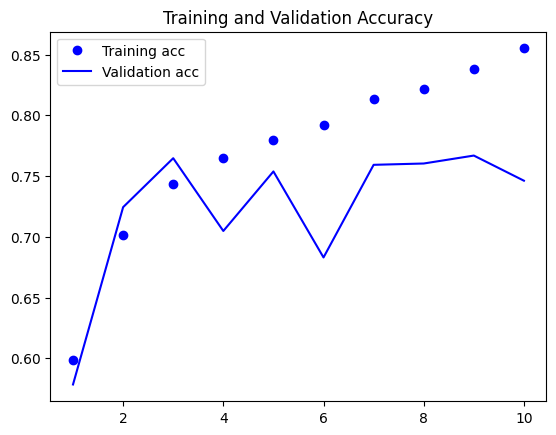

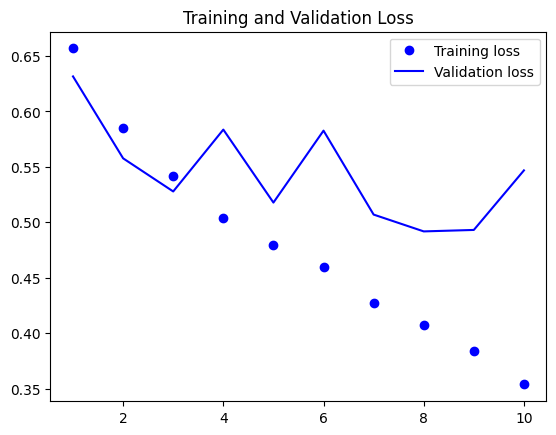

In [17]:
# Plotting Loss and Accuracy:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [18]:
acc_median = np.median(acc)
acc_median

0.7858308255672455

**Answer: `0.8`**

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [19]:
loss_std = np.std(loss)
loss_std

0.08964879189886643

**Answer: `0.091`**

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [20]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

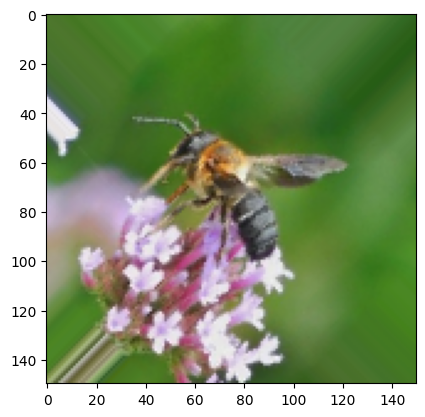

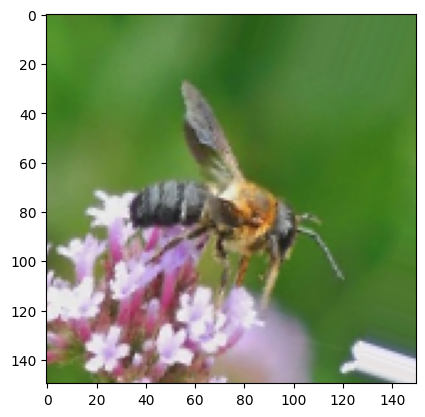

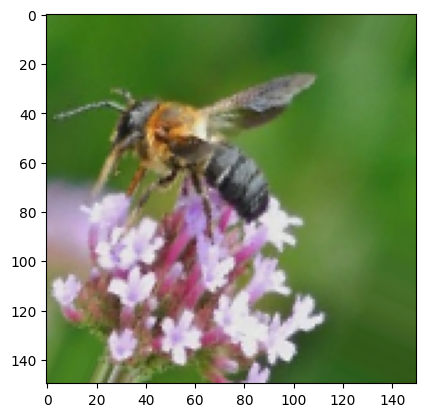

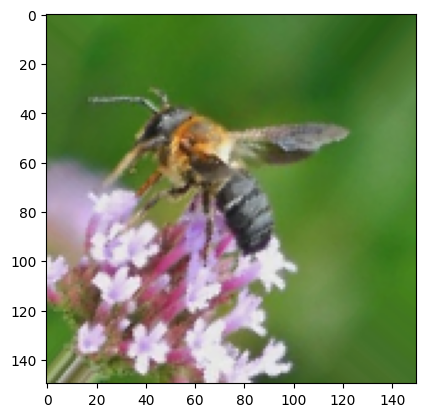

In [22]:

# Inspection:
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
# Training Data Generator:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [24]:
# Test Data Generator:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# Initializing Data Generator:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 3677 images belonging to 2 classes.


In [26]:
# Initializing Data Generator:
validation_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 918 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

In [27]:
# Model training with Augmentation:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
115/115 [==============================] - 16s 134ms/step - loss: 0.5062 - acc: 0.7593 - val_loss: 0.4953 - val_acc: 0.7789
Epoch 2/10
115/115 [==============================] - 15s 126ms/step - loss: 0.4864 - acc: 0.7726 - val_loss: 0.5096 - val_acc: 0.7669
Epoch 3/10
115/115 [==============================] - 15s 128ms/step - loss: 0.4808 - acc: 0.7718 - val_loss: 0.5249 - val_acc: 0.7625
Epoch 4/10
115/115 [==============================] - 15s 128ms/step - loss: 0.4789 - acc: 0.7816 - val_loss: 0.4530 - val_acc: 0.7898
Epoch 5/10
115/115 [==============================] - 14s 126ms/step - loss: 0.4713 - acc: 0.7743 - val_loss: 0.4535 - val_acc: 0.8061
Epoch 6/10
115/115 [==============================] - 15s 126ms/step - loss: 0.4703 - acc: 0.7849 - val_loss: 0.4485 - val_acc: 0.7963
Epoch 7/10
115/115 [==============================] - 14s 126ms/step - loss: 0.4732 - acc: 0.7786 - val_loss: 0.5531 - val_acc: 0.7288
Epoch 8/10
115/115 [==============================] - 1

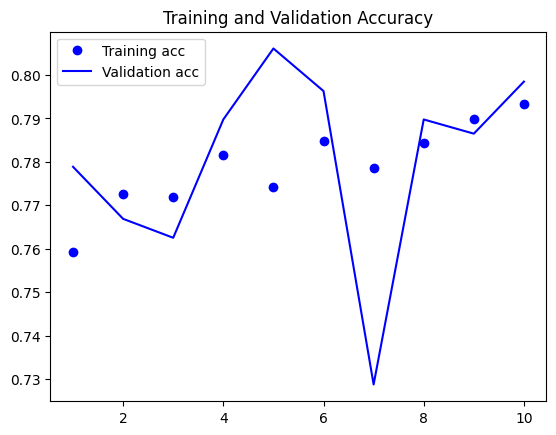

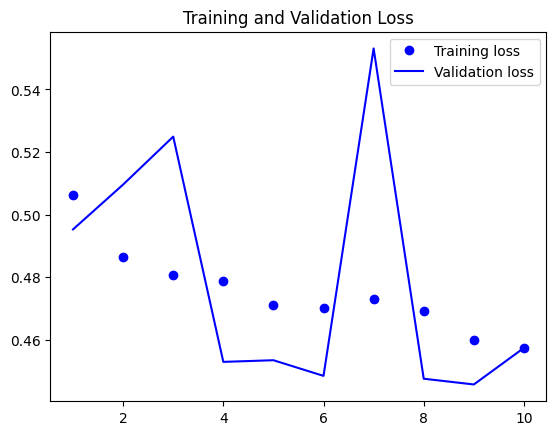

In [28]:
# Plotting Loss and Accuracy:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [29]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.4788484901189804

**Answer: `0.48`**

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [30]:
val_acc_aug[5:10]

[0.7962962985038757,
 0.7287581562995911,
 0.7897603511810303,
 0.7864923477172852,
 0.7984749674797058]

In [31]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7799564242362976

**Answer: `0.78`**